# **Goal: Predict the price of a Skoda used car based on its features**

**PACKAGES IMPORT**

Import of relevant packages for both exploratory analysis and machine learning.

In [ ]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn as sb

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [ ]:
from sklearn.preprocessing import MinMaxScaler, StandardScaler, PolynomialFeatures
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.svm import SVR
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.feature_selection import SelectKBest, f_regression


In [ ]:
#from google.colab import files
#uploaded = files.upload()

In [ ]:
#import io
#df_skoda = pd.read_csv(io.BytesIO(uploaded['skoda.csv']))

Then the Skoda dataset has been imported from Google Drive

In [ ]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

Mounted at /content/drive


In [ ]:
df_skoda= pd.read_csv('/content/drive/MyDrive/uk used cars/skoda.csv')

**PEARSON CORRELATION** 


In [ ]:
pearsoncorr = df_skoda.corr(method='pearson')
pearsoncorr

,year,price,mileage,tax,mpg,engineSize
year,1.000000,0.606285,-0.724449,0.499762,-0.187190,0.008299
price,0.606285,1.000000,-0.480513,0.428709,-0.432489,0.536653
mileage,-0.724449,-0.480513,1.000000,-0.412642,0.225839,0.147115
tax,0.499762,0.428709,-0.412642,1.000000,-0.344302,0.057280
mpg,-0.187190,-0.432489,0.225839,-0.344302,1.000000,-0.162632
engineSize,0.008299,0.536653,0.147115,0.057280,-0.162632,1.000000


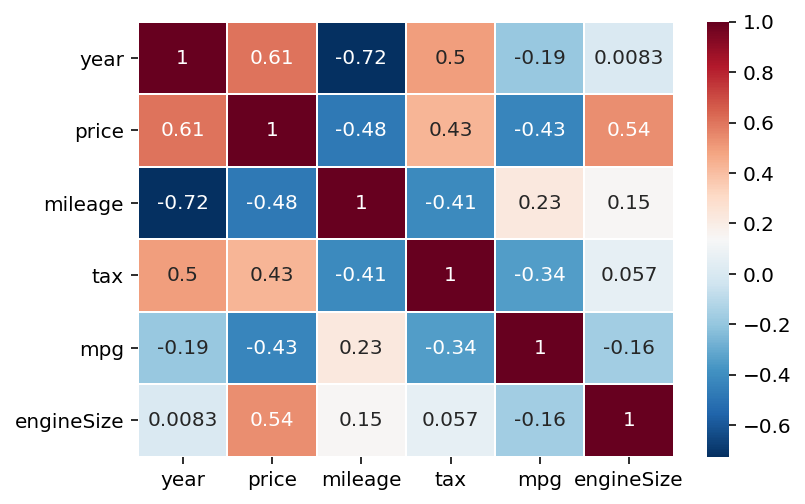

In [ ]:
sb.heatmap(pearsoncorr, 
            xticklabels=pearsoncorr.columns,
            yticklabels=pearsoncorr.columns,
            cmap='RdBu_r',
            annot=True,
            linewidth=0.5);

# **EXPLORATORY ANALYSIS**

**Analysis of the dataset head, of the variables data types and of the shape of the dataset**

In [ ]:
df_skoda.head()        #analysis of the dataset head to study dataset structure

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Octavia,2017,10550,Manual,25250,Petrol,150,54.3,1.4
1,Citigo,2018,8200,Manual,1264,Petrol,145,67.3,1.0
2,Octavia,2019,15650,Automatic,6825,Diesel,145,67.3,2.0
3,Yeti Outdoor,2015,14000,Automatic,28431,Diesel,165,51.4,2.0
4,Superb,2019,18350,Manual,10912,Petrol,150,40.9,1.5


In [ ]:
df_skoda.info()       #analysis of the dataset columns and of their data type 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6267 entries, 0 to 6266
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         6267 non-null   object 
 1   year          6267 non-null   int64  
 2   price         6267 non-null   int64  
 3   transmission  6267 non-null   object 
 4   mileage       6267 non-null   int64  
 5   fuelType      6267 non-null   object 
 6   tax           6267 non-null   int64  
 7   mpg           6267 non-null   float64
 8   engineSize    6267 non-null   float64
dtypes: float64(2), int64(4), object(3)
memory usage: 440.8+ KB


In [ ]:
df_skoda.shape

(6267, 9)

**Check for duplicates**

In [ ]:
sum(df_skoda.duplicated())       #analysis to verify the presente of duplicated rows 

79

In [ ]:
df_skoda.drop_duplicates(inplace = True)     #deletion of duplicate rows

In [ ]:
sum(df_skoda.duplicated())             #double-check to verify that duplicated columns are not present anymore 

0

In [ ]:
df_skoda.describe()                   #analysis of statistical features such five numbers summary, count and mean. 

,year,price,mileage,tax,mpg,engineSize
count,6188.000000,6188.000000,6188.000000,6188.000000,6188.000000,6188.000000
mean,2017.497253,14284.802683,20096.242243,117.450711,56.598788,1.434922
std,1.736243,6340.399929,19831.650102,53.227207,12.072992,0.394893
min,2004.000000,995.000000,5.000000,0.000000,30.100000,0.000000
25%,2017.000000,9495.000000,5863.750000,125.000000,50.400000,1.000000
50%,2018.000000,12998.000000,14665.000000,145.000000,57.700000,1.400000
75%,2019.000000,17995.000000,28000.000000,145.000000,62.800000,2.000000
max,2020.000000,91874.000000,300000.000000,325.000000,201.800000,2.500000


In [ ]:
df_skoda.loc[:, df_skoda.isnull().any()].columns  #Check for missing values

Index([], dtype='object')

**ANALYSIS OF THE INDEPENDENT VARIABLES AGAINST DEPENDENT VARIABLE (PRICE)**

**MILEAGE**

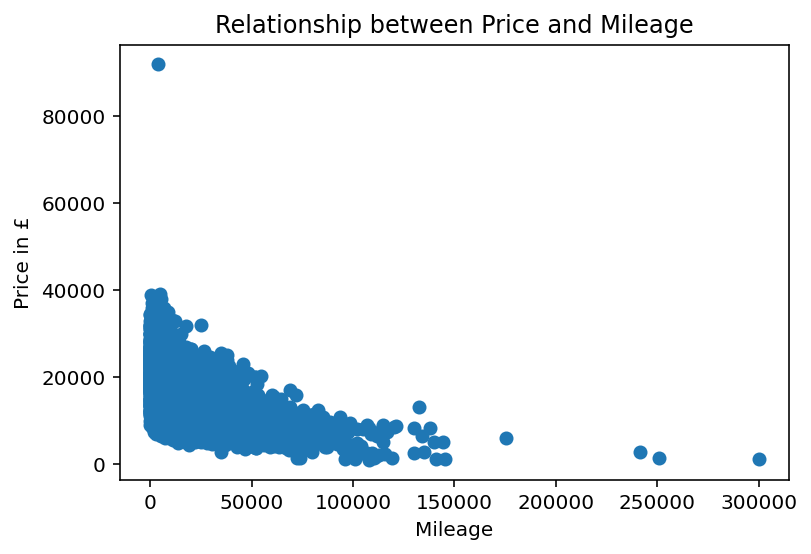

In [ ]:
x = df_skoda['mileage']
plt.xlabel('Mileage')
y = df_skoda ['price']
plt.ylabel('Price in £')
plt.scatter(x,y)
plt.title('Relationship between Price and Mileage')
plt.show()

In [ ]:
df_skoda.drop(df_skoda[df_skoda['price']>80000].index, inplace = True)   #removal of identified outlier

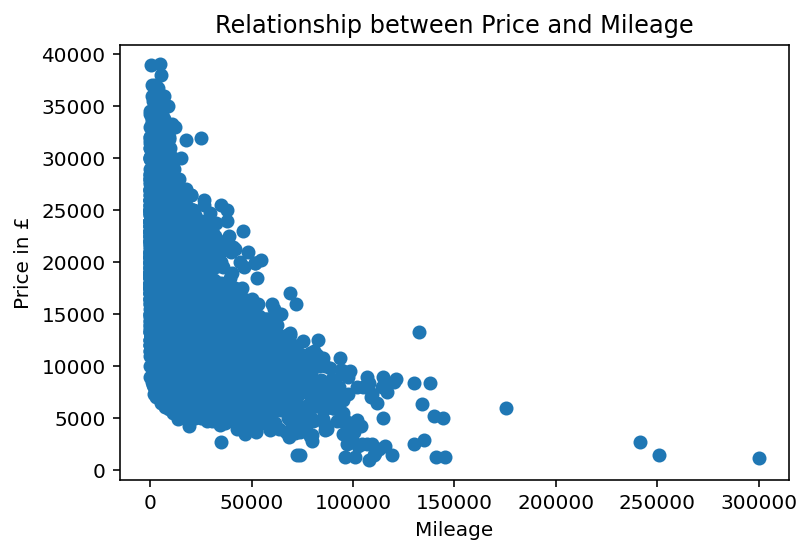

In [ ]:
x = df_skoda['mileage']    #The two variables appear to be negatively correlated; as the mileage increases, the price tends to decrease. 
plt.xlabel('Mileage')
y = df_skoda ['price']
plt.ylabel('Price in £')
plt.scatter(x,y)
plt.title('Relationship between Price and Mileage')
plt.show()

**TAX**

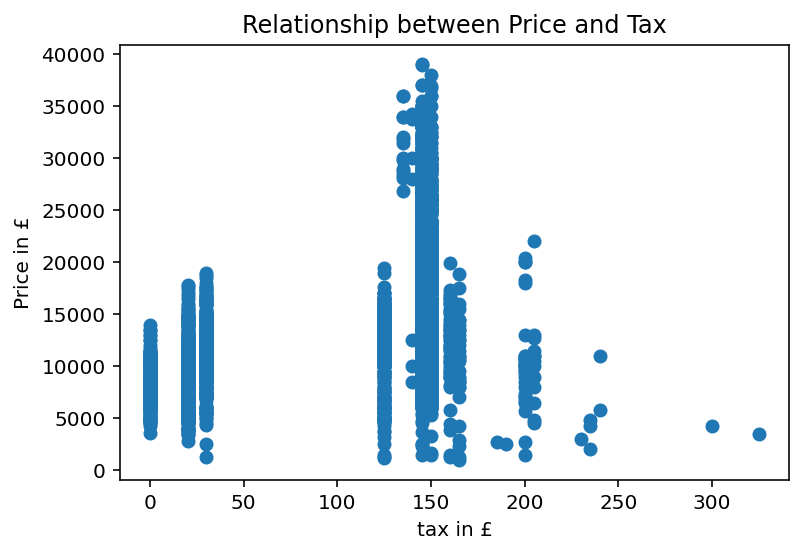

In [ ]:
x = df_skoda['tax']       #the two variables do not seem to be correlated
plt.xlabel('tax in £')
y = df_skoda['price']
plt.ylabel('Price in £')
plt.scatter(x,y)
plt.title('Relationship between Price and Tax')
plt.show()

**MILES PER GALLON**

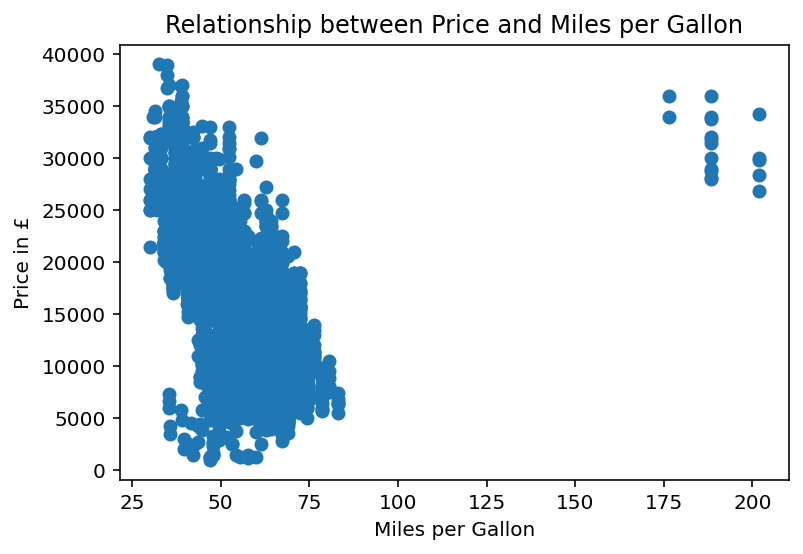

In [ ]:
x = df_skoda['mpg']                     #there seems to be a negative correlation between mpg and price 
plt.xlabel('Miles per Gallon')
y = df_skoda['price']
plt.ylabel('Price in £')
plt.scatter(x,y)
plt.title('Relationship between Price and Miles per Gallon')
plt.show()

In [ ]:
miles_pg= df_skoda.loc[:, ['mpg', 'price']]  #creation of a new dataset taking just the "mpg" and "price" columns from the original dataset

In [ ]:
miles_pg.head()

,mpg,price
0,54.3,10550
1,67.3,8200
2,67.3,15650
3,51.4,14000
4,40.9,18350


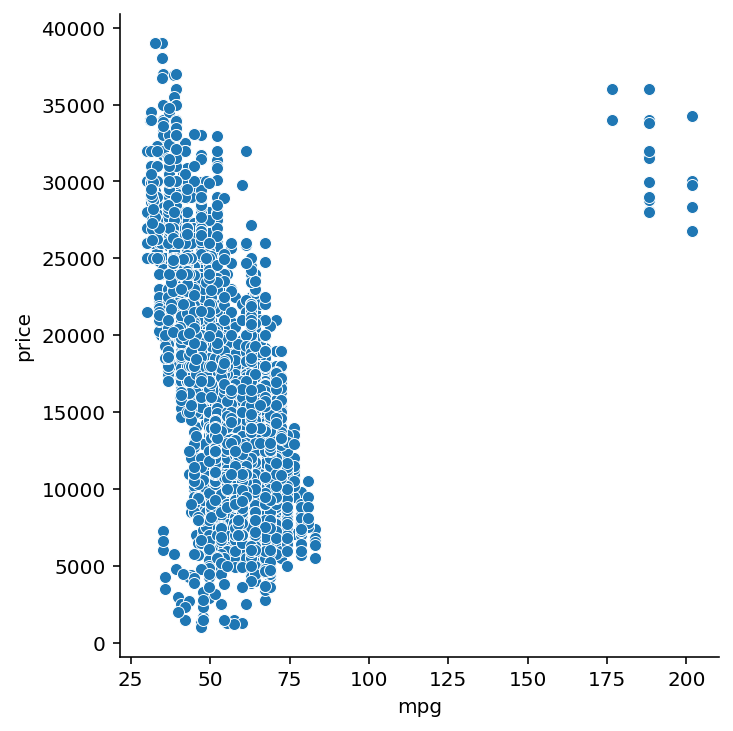

In [ ]:
sns.relplot(x="mpg", y="price", data=miles_pg);    #creation of a more detailed plot using seaborn 

**ENGINE SIZE**

In [ ]:
df_skoda.loc[df_skoda['engineSize'] == 0]  #dropping rows where engine size is equal to 0 (either missing data or wrong data entry)

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
5188,Octavia,2017,16000,Automatic,16166,Diesel,145,61.4,0.0
5276,Octavia,2017,10700,Manual,38552,Petrol,150,55.4,0.0
5334,Fabia,2014,7500,Automatic,26008,Petrol,125,53.3,0.0
5373,Fabia,2018,11500,Manual,10720,Petrol,150,64.2,0.0
5440,Octavia,2017,15400,Automatic,19576,Diesel,145,61.4,0.0


In [ ]:
df_skoda.drop(df_skoda[df_skoda['engineSize'] == 0].index, inplace = True)

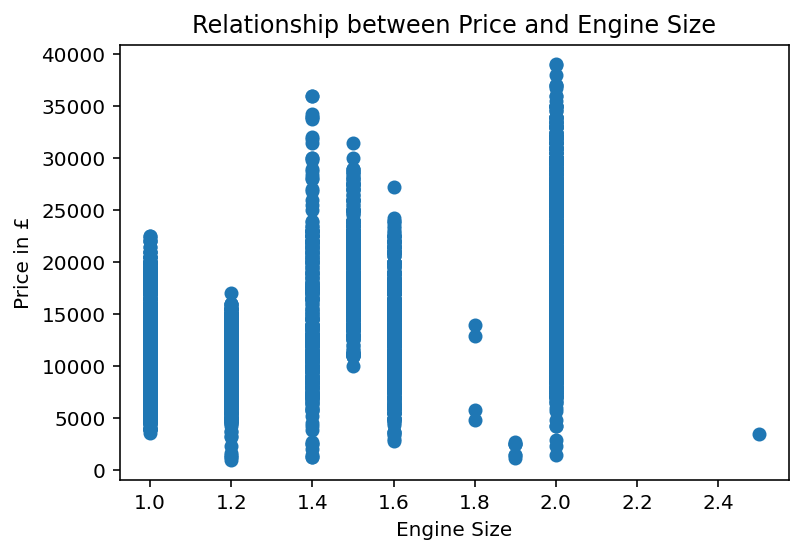

In [ ]:
x = df_skoda['engineSize']   
plt.xlabel('Engine Size')
y = df_skoda['price']
plt.ylabel('Price in £')
plt.scatter(x,y)
plt.title('Relationship between Price and Engine Size')
plt.show()

**FUEL TYPE**

In [ ]:
df_skoda.loc[:, ['fuelType', 'price']]

,fuelType,price
0,Petrol,10550
1,Petrol,8200
2,Diesel,15650
3,Diesel,14000
4,Petrol,18350
...,...,...
6262,Petrol,11440
6263,Petrol,10990
6264,Petrol,9500
6265,Petrol,5999


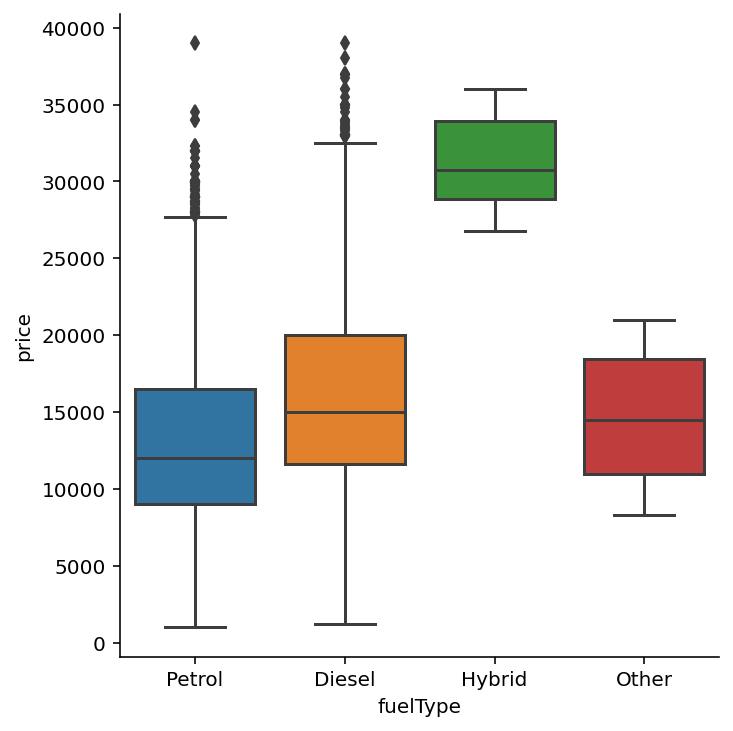

In [ ]:
sns.catplot(x="fuelType", y="price", kind="box", data= df_skoda);    #since fuelType is a categorical variable, a box plot has been used to study its relationship with price

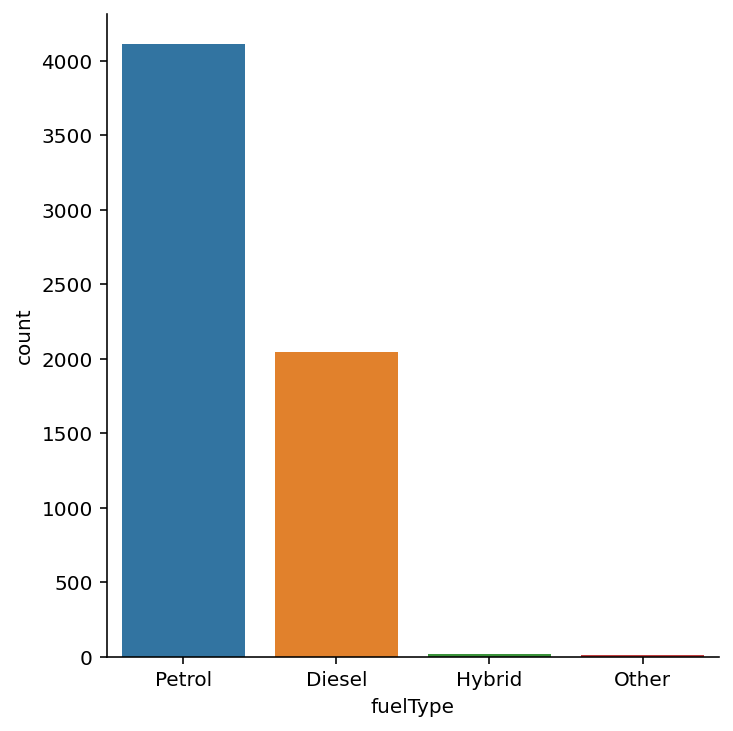

In [ ]:
sns.catplot(x="fuelType", kind="count", data=df_skoda);   #calculated frequency of each fuel type across the dataset

**TRANSMISSION**

In [ ]:
df_skoda.loc[:, ['transmission', 'price']]

,transmission,price
0,Manual,10550
1,Manual,8200
2,Automatic,15650
3,Automatic,14000
4,Manual,18350
...,...,...
6262,Semi-Auto,11440
6263,Semi-Auto,10990
6264,Semi-Auto,9500
6265,Manual,5999


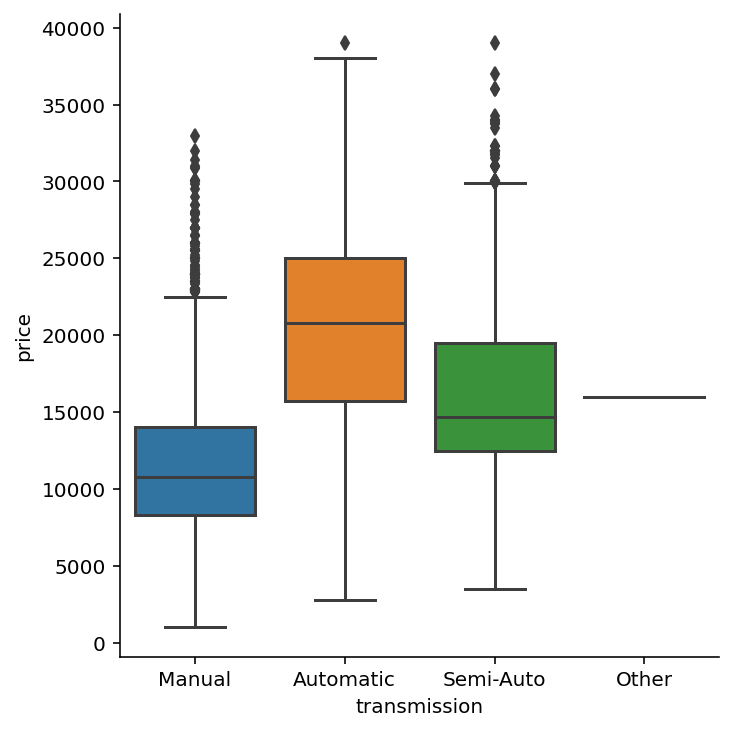

In [ ]:
sns.catplot(x="transmission", y="price", kind="box", data= df_skoda);

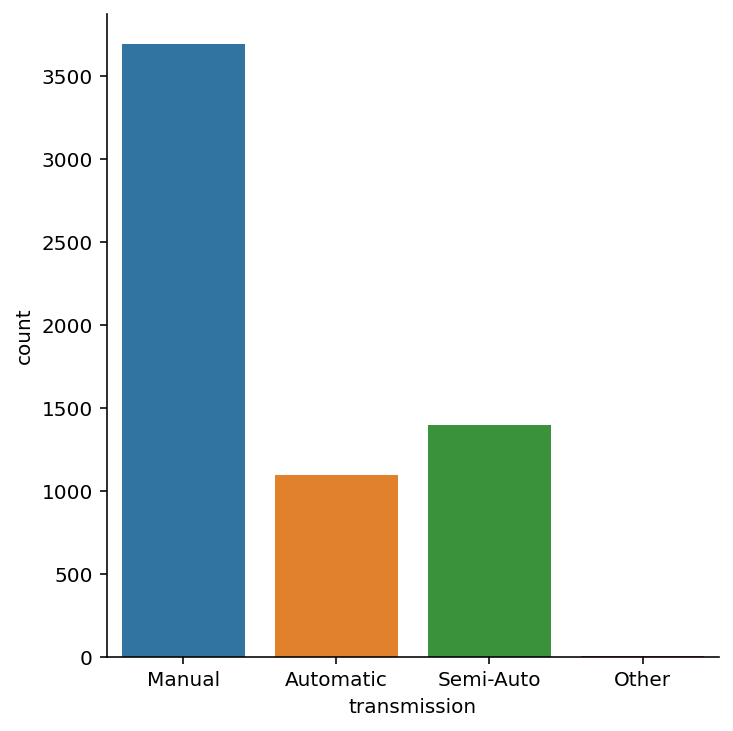

In [ ]:
sns.catplot(x="transmission", kind="count", data=df_skoda);

**MODEL**

In [ ]:
df_skoda.loc[:, ['model', 'price']]

,model,price
0,Octavia,10550
1,Citigo,8200
2,Octavia,15650
3,Yeti Outdoor,14000
4,Superb,18350
...,...,...
6262,Yeti,11440
6263,Octavia,10990
6264,Fabia,9500
6265,Citigo,5999


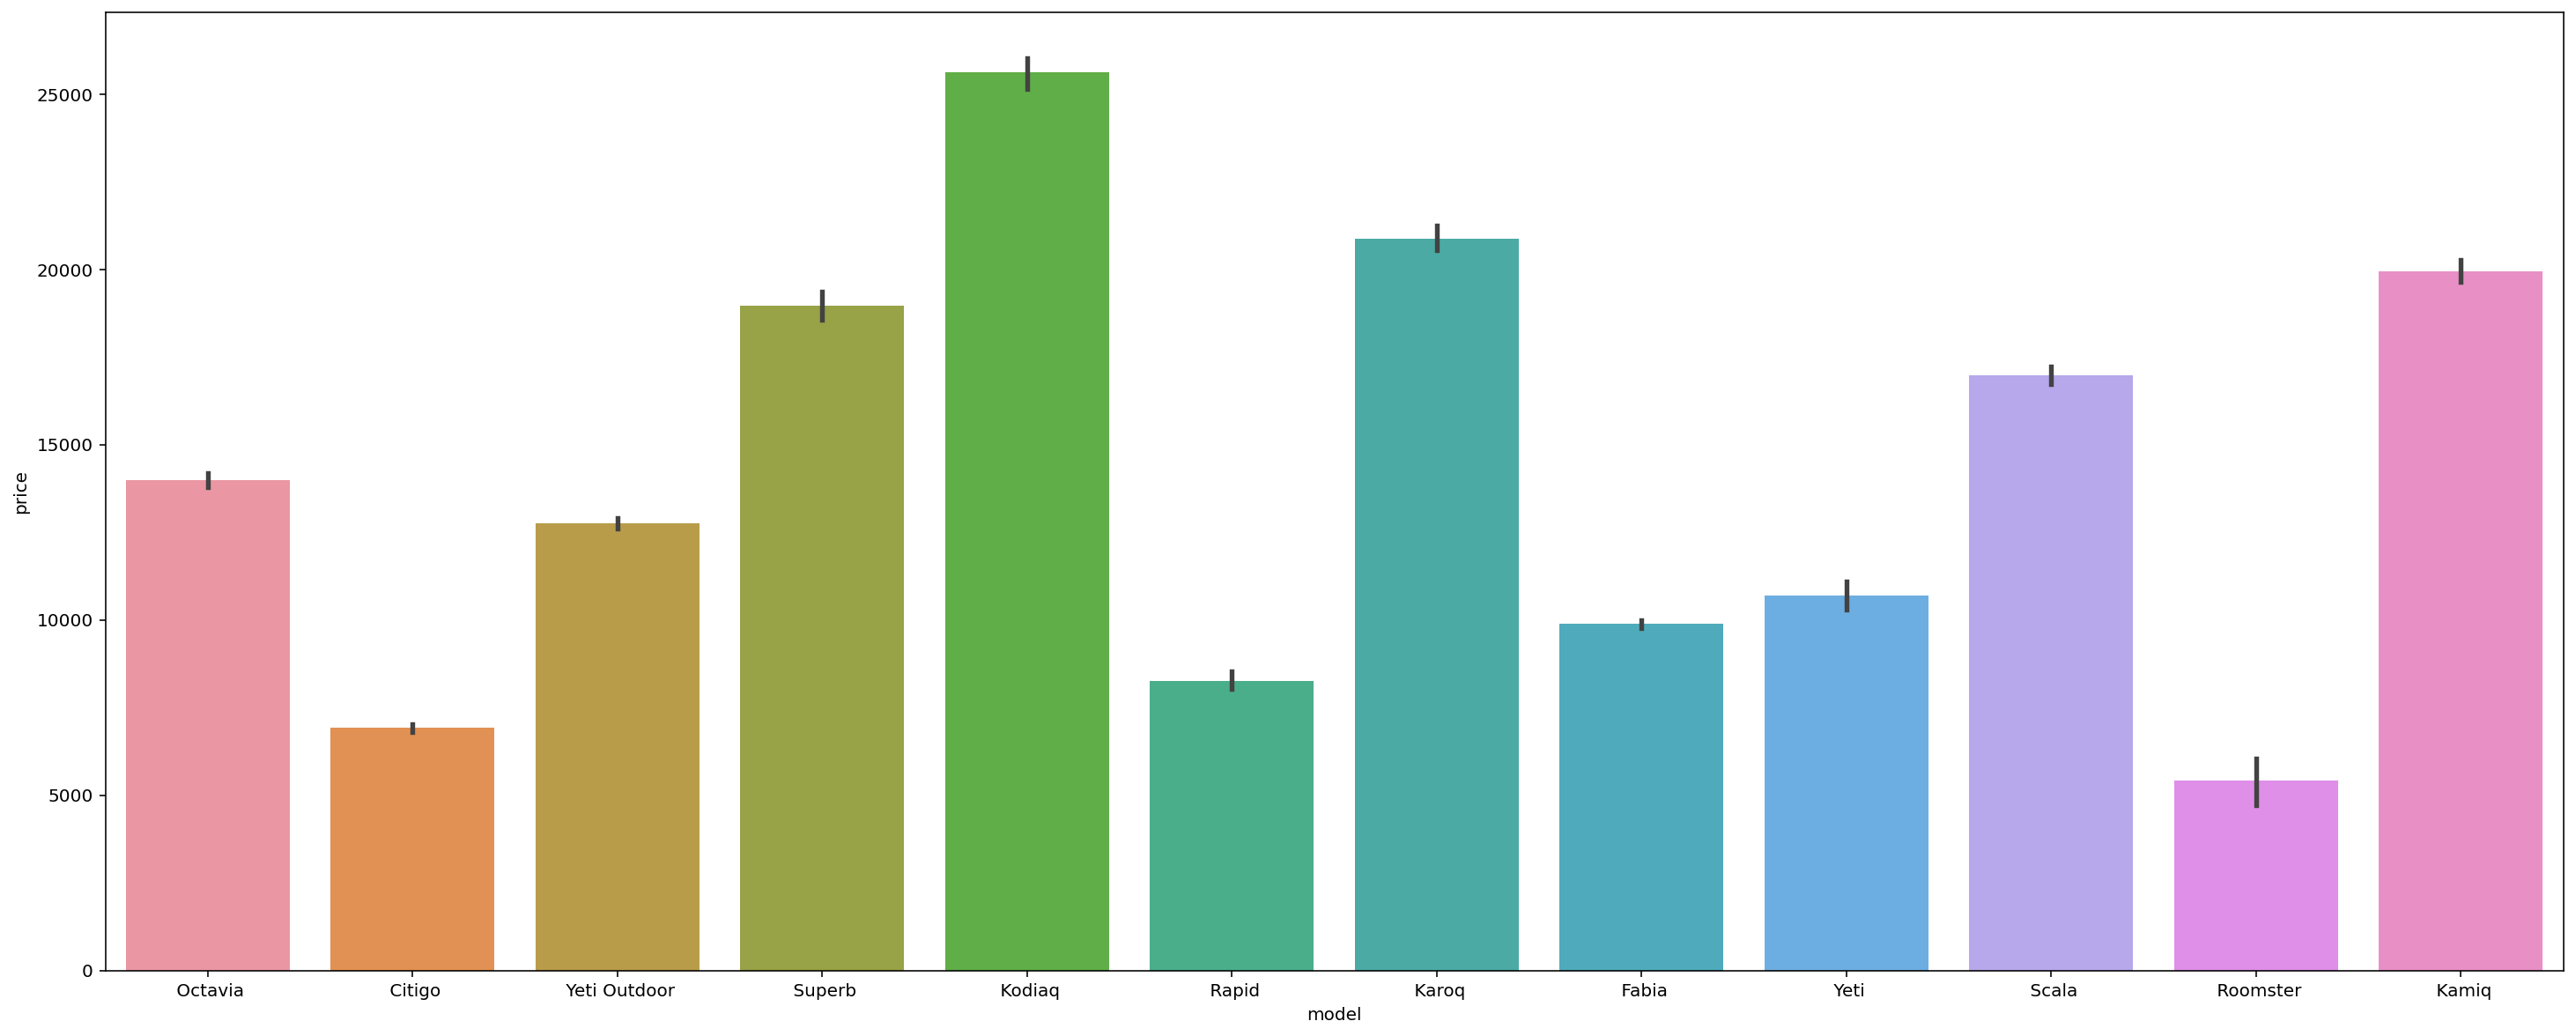

In [ ]:
fig_dims = (25, 10)
fig, ax = plt.subplots(figsize=fig_dims)
sns.barplot(x = "model", y = "price", ax=ax, data=df_skoda)
plt.show()

In [ ]:
skoda_ML = df_skoda.copy()      #creation of a new cleaned dataset to use as a base for the ML part 

In [ ]:
skoda_ML.head()

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,Octavia,2017,10550,Manual,25250,Petrol,150,54.3,1.4
1,Citigo,2018,8200,Manual,1264,Petrol,145,67.3,1.0
2,Octavia,2019,15650,Automatic,6825,Diesel,145,67.3,2.0
3,Yeti Outdoor,2015,14000,Automatic,28431,Diesel,165,51.4,2.0
4,Superb,2019,18350,Manual,10912,Petrol,150,40.9,1.5


# **MACHINE LEARNING**

**Putting the output column (price) to the right end**

In [ ]:
skoda_ML = skoda_ML[['model','year','transmission','mileage','fuelType','tax','mpg','engineSize','price']]

In [ ]:
skoda_ML.head()

,model,year,transmission,mileage,fuelType,tax,mpg,engineSize,price
0,Octavia,2017,Manual,25250,Petrol,150,54.3,1.4,10550
1,Citigo,2018,Manual,1264,Petrol,145,67.3,1.0,8200
2,Octavia,2019,Automatic,6825,Diesel,145,67.3,2.0,15650
3,Yeti Outdoor,2015,Automatic,28431,Diesel,165,51.4,2.0,14000
4,Superb,2019,Manual,10912,Petrol,150,40.9,1.5,18350


**Creation of dummy variables to deal with categorical features of the dataset**

In [ ]:
skoda_ML_dummy= pd.get_dummies(skoda_ML)
skoda_ML_dummy.head()
skoda_ML_dummy.shape

(6182, 26)

In [ ]:
skoda_ML_dummy.head()

,year,mileage,tax,mpg,engineSize,price,model_ Citigo,model_ Fabia,model_ Kamiq,model_ Karoq,model_ Kodiaq,model_ Octavia,model_ Rapid,model_ Roomster,model_ Scala,model_ Superb,model_ Yeti,model_ Yeti Outdoor,transmission_Automatic,transmission_Manual,transmission_Other,transmission_Semi-Auto,fuelType_Diesel,fuelType_Hybrid,fuelType_Other,fuelType_Petrol
0,2017,25250,150,54.3,1.4,10550,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,1
1,2018,1264,145,67.3,1.0,8200,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1
2,2019,6825,145,67.3,2.0,15650,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,1,0,0,0
3,2015,28431,165,51.4,2.0,14000,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0
4,2019,10912,150,40.9,1.5,18350,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,1


In [ ]:
from sklearn.model_selection import train_test_split
X = skoda_ML_dummy.drop(['price'],axis=1)
y = skoda_ML_dummy['price']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

**From here onwards, two options have been taken into consideration. First is to use XGBoost and the second is to select best linear and polynomial features without using features scaling (would have lead to overfitting)**

**1st Method: XGBoost**

In [ ]:
import xgboost
model = xgboost.XGBRegressor(colsample_bytree=0.4,
                 gamma=0,                 
                 learning_rate=0.005,
                 max_depth=3,
                 min_child_weight=1.5,
                 n_estimators=15000,                                                                    
                 reg_alpha=0.75,
                 reg_lambda=0.45,
                 subsample=0.6,
                 seed=42) 

In [ ]:
model.fit(X_train,y_train)

[11:27:42] WARNING: /workspace/src/objective/regression_obj.cu:152: reg:linear is now deprecated in favor of reg:squarederror.


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=0.4, gamma=0,
             importance_type='gain', learning_rate=0.005, max_delta_step=0,
             max_depth=3, min_child_weight=1.5, missing=None,
             n_estimators=15000, n_jobs=1, nthread=None, objective='reg:linear',
             random_state=0, reg_alpha=0.75, reg_lambda=0.45,
             scale_pos_weight=1, seed=42, silent=None, subsample=0.6,
             verbosity=1)

In [ ]:
y_pred=model.predict(X_test)

In [ ]:
from sklearn.metrics import r2_score
R_square=r2_score(y_pred,y_test)
print(R_square)

0.9500391068806813


In [ ]:
y_pred_df= pd.DataFrame({'Price_prediction': y_pred})
y_test_df = pd.DataFrame(y_test)
y_test = y_test.reset_index()
Comparison = y_test.join(y_pred_df) 
Comparison = Comparison.drop(['index'], axis=1)
Comparison.head()

,price,Price_prediction
0,5950,6208.242188
1,6990,7069.265137
2,18990,19053.169922
3,13495,12586.151367
4,12060,13514.670898


In [ ]:
print(y_pred)

[ 6208.242   7069.265  19053.17   ... 25669.795   7771.5156 13387.689 ]


**2nd Method: use linear and polynomial features to identify best ML technique**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(skoda_ML_dummy.drop(columns = ['price']),
                                                    skoda_ML_dummy[['price']],
                                                    test_size = 0.2, random_state = 42)

In [ ]:
print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

(4945, 25)
(4945, 1)
(1237, 25)
(1237, 1)


In [ ]:
"""X_train = X_train.fillna(X_train.mean()
y_train = y_train.fillna(y_train.mean())
X_test = X_test.fillna(X_test.mean())
y_test =y_test.fillna(y_test.mean())"""

'X_train = X_train.fillna(X_train.mean()\ny_train = y_train.fillna(y_train.mean())\nX_test = X_test.fillna(X_test.mean())\ny_test =y_test.fillna(y_test.mean())'

**Best features evaluation**

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example usin

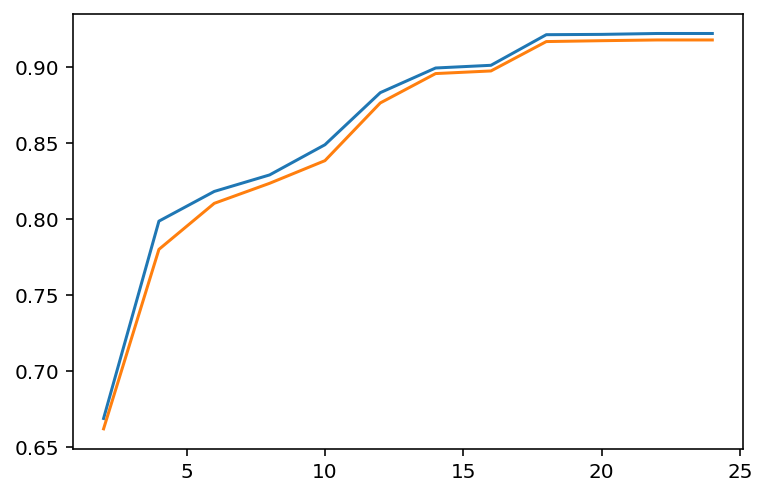

In [ ]:
features = skoda_ML_dummy.drop(columns = ['price']).columns

N = []                                                                  
r_squared_train = []
r_squared_test = []

for k in range(2, 26, 2):   
    
    selector = SelectKBest(f_regression, k = k)                   
    
    X_train_transformed = selector.fit_transform(X_train, y_train)
    X_test_transformed = selector.transform(X_test)
    
    LR = LinearRegression()
    LR.fit(X_train_transformed, y_train)
    
    N.append(k)
    r_squared_train.append(LR.score(X_train_transformed, y_train))
    r_squared_test.append(LR.score(X_test_transformed, y_test))
    
sns.lineplot(x = N, y = r_squared_train)
sns.lineplot(x = N, y = r_squared_test)
plt.show()

In [ ]:
selector = SelectKBest(f_regression, k = 17)
X_train_transformed = selector.fit_transform(X_train, y_train)
X_test_transformed = selector.transform(X_test)
features[selector.get_support()]

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Index(['year', 'mileage', 'tax', 'mpg', 'engineSize', 'model_ Citigo',
       'model_ Fabia', 'model_ Karoq', 'model_ Kodiaq', 'model_ Rapid',
       'model_ Superb', 'transmission_Automatic', 'transmission_Manual',
       'transmission_Semi-Auto', 'fuelType_Diesel', 'fuelType_Hybrid',
       'fuelType_Petrol'],
      dtype='object')

**Definition of a linear regression function to identify the best model for prediction**

In [ ]:
def regression_function(model):
    
    regressor = model
    regressor.fit(X_train_transformed, y_train)
    score = regressor.score(X_test_transformed, y_test)   
    return regressor, score

In [ ]:
model_performance = pd.DataFrame(columns = ["Features", "Model", "Score"])
model_selections = [LinearRegression(),  MLPRegressor(), Ridge(), SVR(), RandomForestRegressor()]

for model in model_selections:
    regressor, score = regression_function(model)
    model_performance = model_performance.append({"Features": "Linear","Model": model, "Score": score},ignore_index=True)

model_performance

/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:571: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  % self.max_iter, ConvergenceWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example us

,Features,Model,Score
0,Linear,"LinearRegression(copy_X=True, fit_intercept=Tr...",0.914504
1,Linear,"MLPRegressor(activation='relu', alpha=0.0001, ...",0.463497
2,Linear,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",0.912803
3,Linear,"SVR(C=1.0, cache_size=200, coef0=0.0, degree=3...",0.031388
4,Linear,"(DecisionTreeRegressor(ccp_alpha=0.0, criterio...",0.949055


**Definition of a polynomial regression function to identify the best model for prediction**

In [ ]:
poly = PolynomialFeatures()
X_train_transformed_poly = poly.fit_transform(X_train)
X_test_transformed_poly = poly.transform(X_test)

print(X_train_transformed_poly.shape)

(4945, 351)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_sa

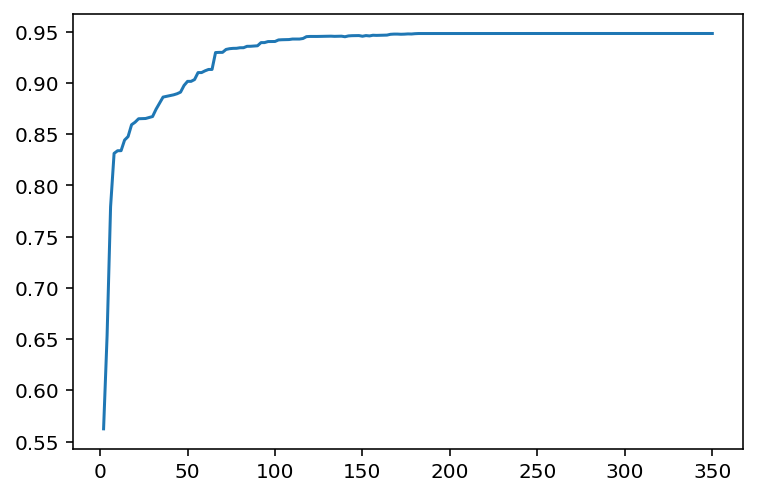

In [ ]:
N = []   #no.of features
r_squared = []

for k in range(2, 351, 2): 
    selector = SelectKBest(f_regression, k = k)
    X_train_transformed = selector.fit_transform(X_train_transformed_poly, y_train)
    R = LinearRegression()
    R.fit(X_train_transformed, y_train)
    N.append(k)
    r_squared.append(R.score(X_train_transformed, y_train))
    
sns.lineplot(x = N, y = r_squared)
plt.show()

In [ ]:
selector = SelectKBest(f_regression, k =250)

X_train_transformed = selector.fit_transform(X_train_transformed_poly, y_train)
X_test_transformed = selector.transform(X_test_transformed_poly)

models_used = [LinearRegression(), MLPRegressor(), Ridge(), SVR(), RandomForestRegressor()]

for model in models_used:
    regressor, score = regression_function(model)
    model_performance = model_performance.append({"Features": "Polynomial","Model": model, "Score": score}, ignore_index=True)

model_performance

/usr/local/lib/python3.7/dist-packages/sklearn/utils/validation.py:760: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: divide by zero encountered in true_divide
  corr /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:299: RuntimeWarning: invalid value encountered in true_divide
  corr /= X_norms
/usr/local/lib/python3.7/dist-packages/sklearn/feature_selection/_univariate_selection.py:304: RuntimeWarning: invalid value encountered in true_divide
  F = corr ** 2 / (1 - corr ** 2) * degrees_of_freedom
/usr/local/lib/python3.7/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:1342: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change t

,Features,Model,Score
0,Linear,"LinearRegression(copy_X=True, fit_intercept=Tr...",0.914504
1,Linear,"MLPRegressor(activation='relu', alpha=0.0001, ...",0.463497
2,Linear,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",0.912803
3,Linear,"SVR(C=1.0, cache_size=200, coef0=0.0, degree=3...",0.031388
4,Linear,"(DecisionTreeRegressor(ccp_alpha=0.0, criterio...",0.949055
5,Polynomial,"LinearRegression(copy_X=True, fit_intercept=Tr...",-579.222198
6,Polynomial,"MLPRegressor(activation='relu', alpha=0.0001, ...",-168285.392066
7,Polynomial,"Ridge(alpha=1.0, copy_X=True, fit_intercept=Tr...",0.907484
8,Polynomial,"SVR(C=1.0, cache_size=200, coef0=0.0, degree=3...",-0.010941
9,Polynomial,"(DecisionTreeRegressor(ccp_alpha=0.0, criterio...",0.948566


**Random Forest has turned out to be the best model both for linear and polynomial regression**

In [ ]:
RF = RandomForestRegressor(n_estimators = 3000, random_state = 42)
RF.fit(X_train_transformed_poly, y_train)

y_pred = RF.predict(X_test_transformed_poly)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


In [ ]:
y_test = y_test.reset_index()
y_pred_df = pd.DataFrame({'Price_prediction': y_pred.flatten()})

In [ ]:
Comparison = y_test.join(y_pred_df) 
Comparison = Comparison.drop(['index'], axis=1)
Comparison.head()

,price,Price_prediction
0,5950,7774.318333
1,6990,7618.517667
2,18990,19670.862244
3,13495,13189.937333
4,12060,12955.030333


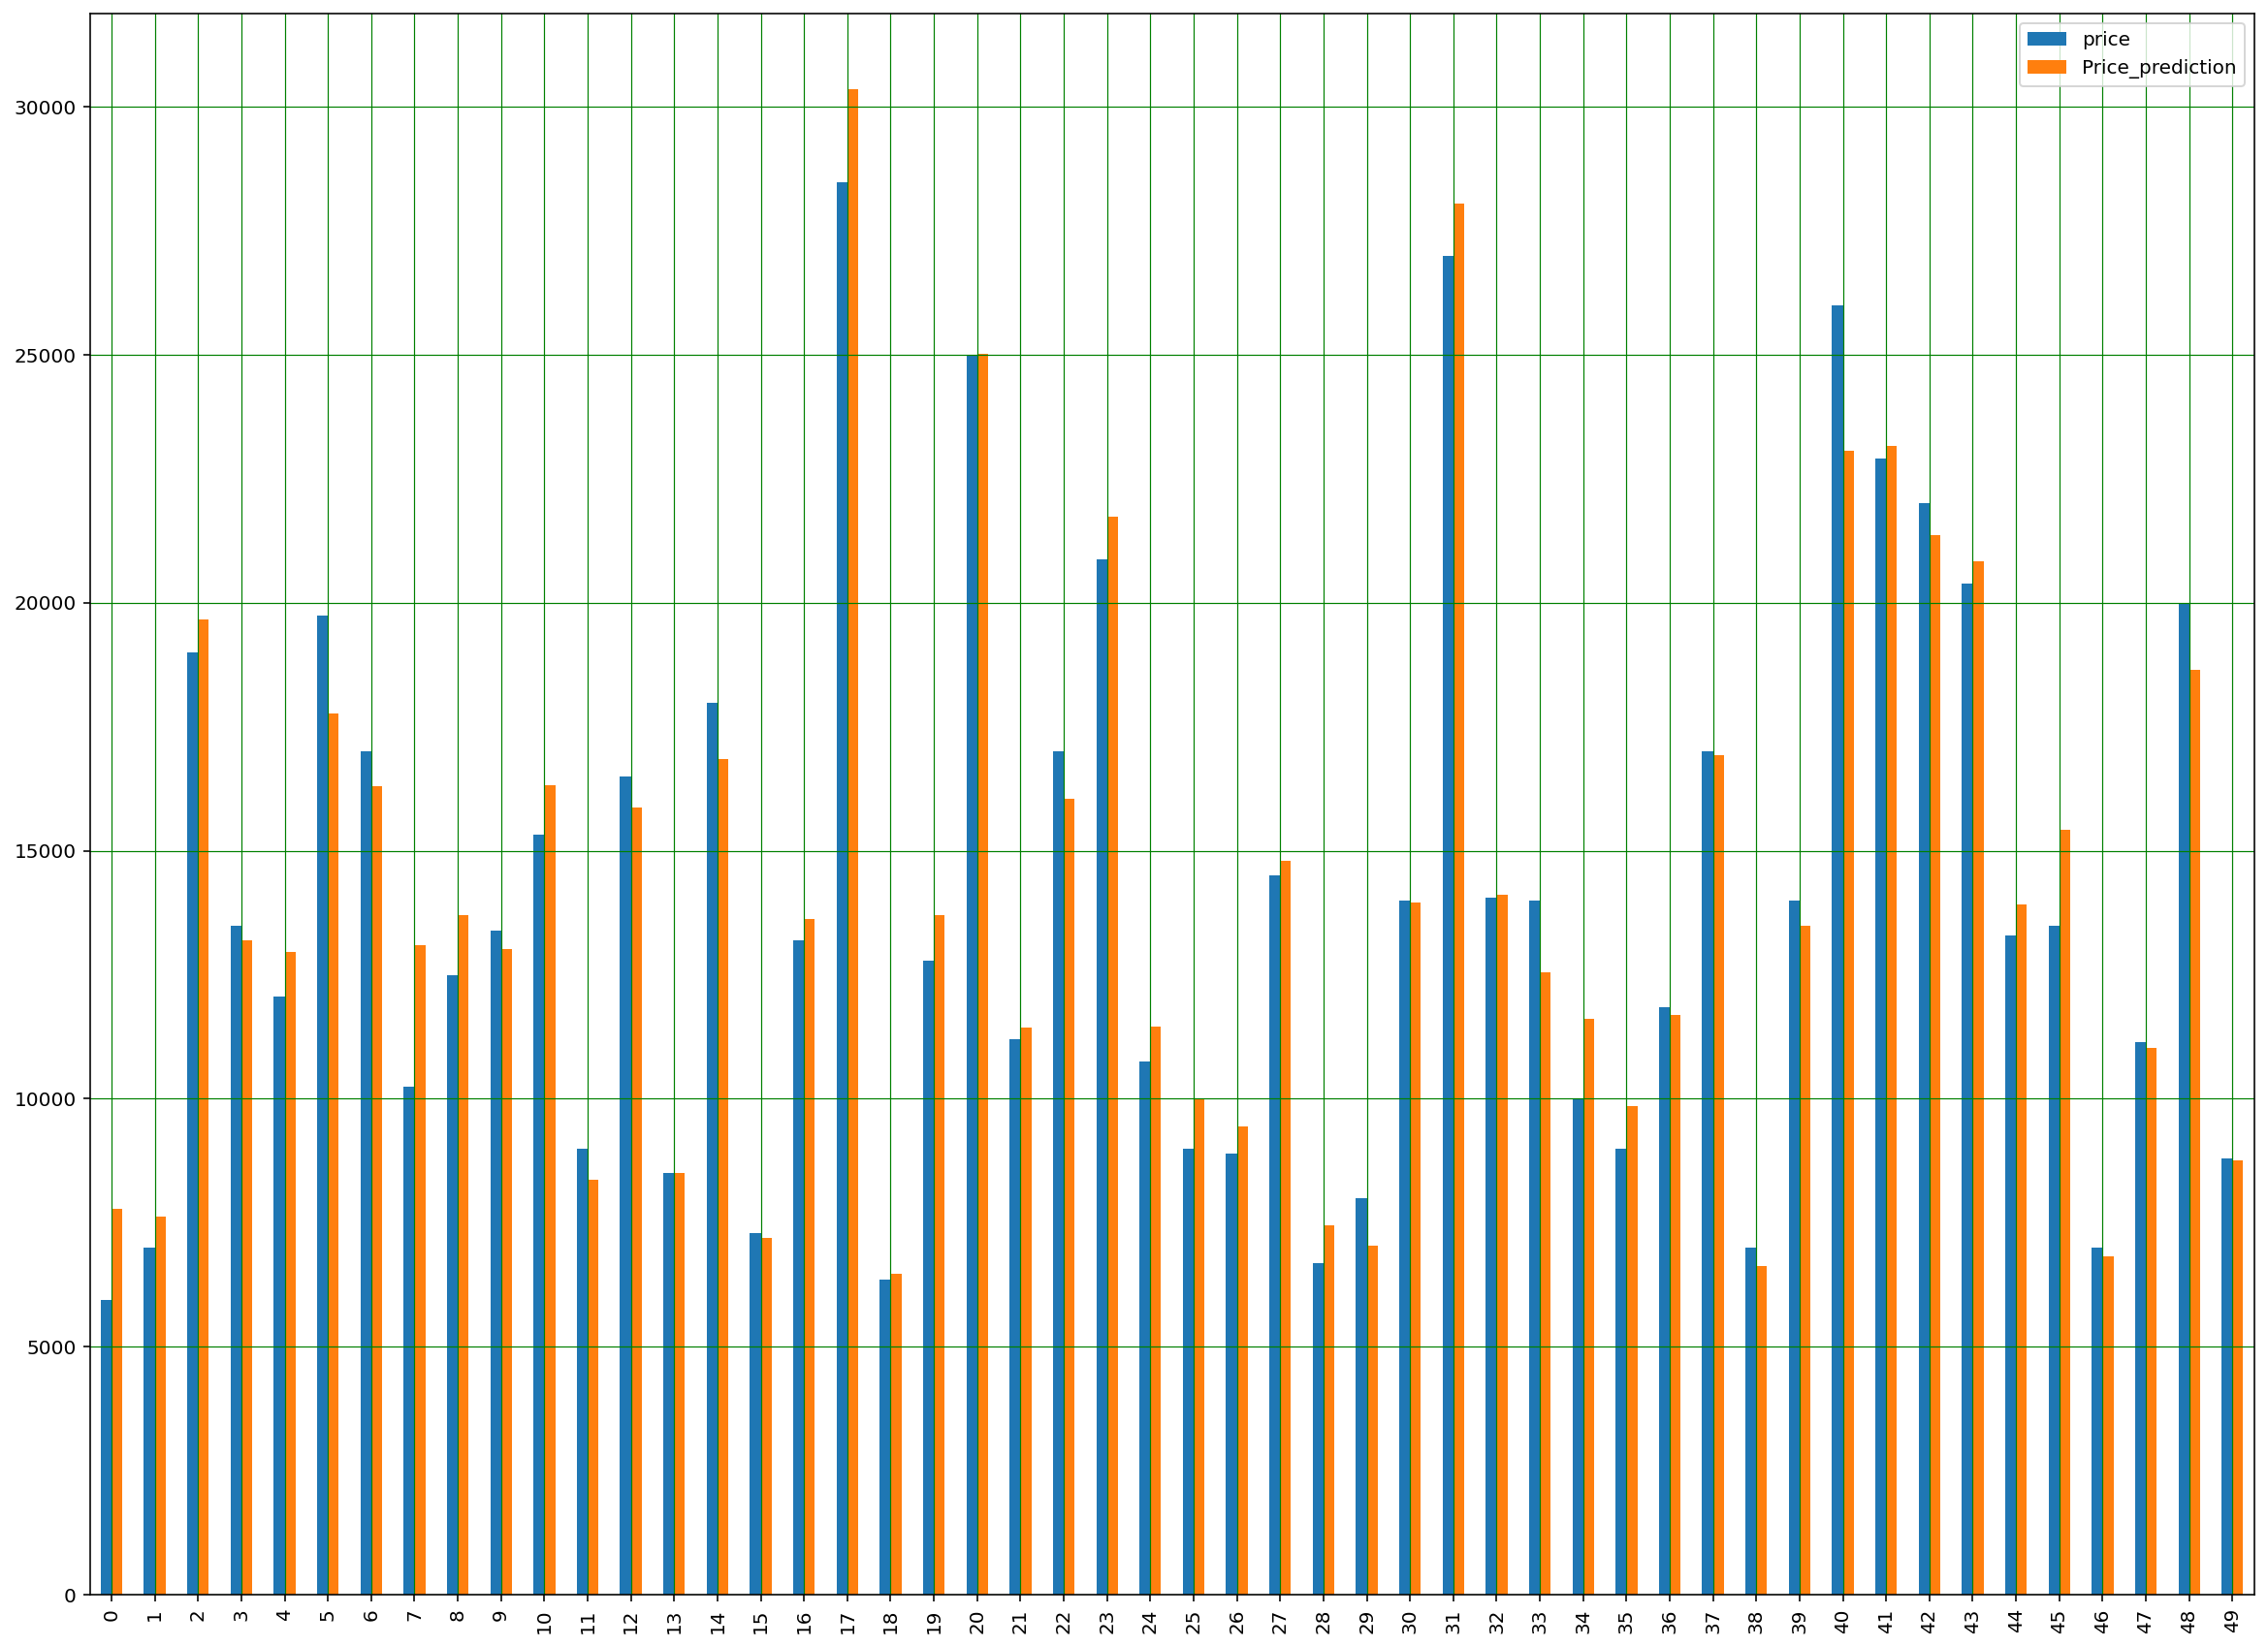

In [ ]:
x = 50
comparison = Comparison.head(x)
comparison.plot(kind = 'bar', figsize = (20,15))
plt.grid(linestyle = '-', linewidth = '0.6', color = 'green', which = 'both')
plt.show()